# Nonlinear oscillator

This example implements a nonlinear harmonic oscillator
in a 2D neural population.
Unlike the simple oscillator whose recurrent connection
implements a linear transformation,
this model approximates a nonlinear function
in the recurrent connection to yield oscillatory behavior.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

import nengo
import nengo_loihi

nengo_loihi.set_defaults()

## Creating the network in Nengo

Our model consists of one recurrently connected ensemble.
Unlike the simple oscillator,
we do not need to give this nonlinear oscillator
an initial kick.

In [2]:
tau = 0.1


def recurrent_func(x):
    x0, x1 = x
    r = np.sqrt(x0 ** 2 + x1 ** 2)
    a = np.arctan2(x1, x0)
    dr = -(r - 1)
    da = 3.0
    r = r + tau * dr
    a = a + tau * da
    return [r * np.cos(a), r * np.sin(a)]


with nengo.Network(label="Oscillator") as model:
    ens = nengo.Ensemble(200, dimensions=2)
    nengo.Connection(ens, ens, function=recurrent_func, synapse=tau)
    ens_probe = nengo.Probe(ens, synapse=0.1)

## Running the network in Nengo

We can use Nengo to see the desired model output.

In [3]:
with nengo.Simulator(model) as sim:
    sim.run(10)
t = sim.trange()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

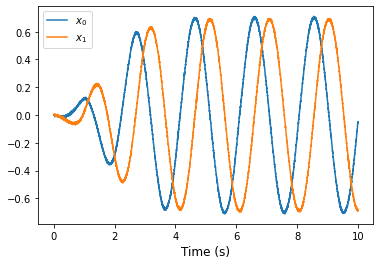

In [4]:
def plot_over_time(t, data):
    plt.figure()
    plt.plot(t, data[ens_probe])
    plt.xlabel("Time (s)", fontsize="large")
    plt.legend(["$x_0$", "$x_1$"])


plot_over_time(t, sim.data)

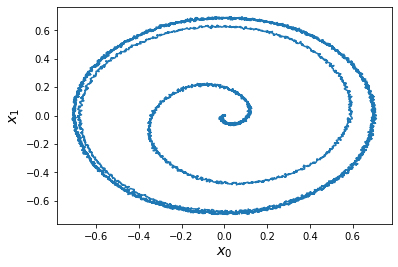

In [5]:
def plot_xy(data):
    plt.figure()
    plt.plot(data[ens_probe][:, 0], data[ens_probe][:, 1])
    plt.xlabel("$x_0$", fontsize="x-large")
    plt.ylabel("$x_1$", fontsize="x-large")


plot_xy(sim.data)

## Running the network with NengoLoihi

In [6]:
with nengo_loihi.Simulator(model) as sim:
    sim.run(10)
t = sim.trange()

/home/travis/build/nengo/nengo-loihi/nengo_loihi/builder/discretize.py:477: UserWarning: Lost 2 extra bits in weight rounding
  warnings.warn("Lost %d extra bits in weight rounding" % (-s2,))


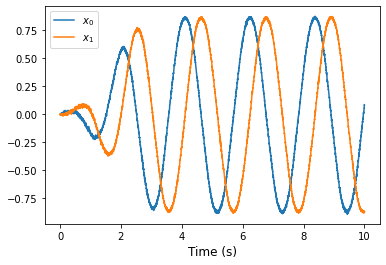

In [7]:
plot_over_time(t, sim.data)

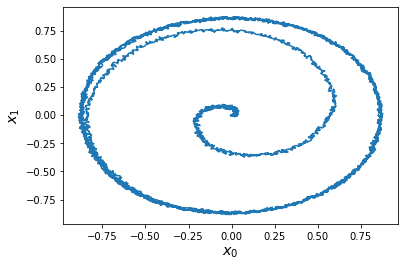

In [8]:
plot_xy(sim.data)